<a href="https://colab.research.google.com/github/lilyzhizhou/Datathon-4/blob/main/Datathon_4_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Load in data
# Lily
data_raw = pd.read_csv('/content/drive/MyDrive/Machine Learning /Datathon #4/datathon4.csv')


In [37]:
#data_raw.columns.tolist()

In [13]:
#data_raw = data_raw.sort_values('Patient_ID')
print(data_raw.shape)
data_raw.head()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

Filter by:
- icu_admit-source = Accident & Emergency

Comparison of how accurate our model is:
- apache 2 score
- apache 3 score

Outcome variable:
- hospital_death

Variables to keep:
- age
- bmi
- ethnicity
- gender
- admission from the ED
- all apache related variables



Filter data

---



In [30]:
columns_to_keep = data_raw.columns[data_raw.columns.str.contains('apache')].tolist() + ['hospital_death',
                                                                                        'age',
                                                                                        'bmi',
                                                                                        'ethnicity',
                                                                                        'gender',
                                                                                        'icu_admit_source',
                                                                                        'aids',
                                                                                        'cirrhosis',
                                                                                        'diabetes_mellitus',
                                                                                        'hepatic_failure',
                                                                                        'immunosuppression',
                                                                                        'leukemia',
                                                                                        'lymphoma',
                                                                                        'solid_tumor_with_metastasis']
data = data_raw[columns_to_keep]

# remove other variables
data = data.drop(['apache_2_diagnosis','apache_3j_diagnosis','apache_4a_hospital_death_prob',
                  'apache_4a_icu_death_prob','apache_3j_bodysystem','apache_2_bodysystem'], axis = 1)

print(data.shape)
data.head()

(91713, 40)


,albumin_apache,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,hospital_death,age,bmi,ethnicity,gender,icu_admit_source,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,2.3,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,0,68.0,22.73,Caucasian,M,Floor,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.7,0,77.0,27.42,Caucasian,F,Floor,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,NaN,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,0,25.0,31.95,Caucasian,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,NaN,34.8,NaN,1.0,8.0,0,81.0,22.64,Caucasian,F,Operating Room / Recovery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0.0,NaN,0,19.0,NaN,Caucasian,M,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Filter to only have those who were admitted straight from admission
data = data[data['icu_admit_source'] == 'Accident & Emergency']
data['icu_admit_source'].value_counts()

Accident & Emergency    54060
Name: icu_admit_source, dtype: int64

In [32]:
# Drop admit source
data = data.drop('icu_admit_source', axis = 1)

- we now have 38 predictor variables, 1 outcome variable
- 54,000 observations



Checking for NA values

---



In [33]:
missing_count = data.isna().sum()
total_count = len(data)
missing_percentage = (missing_count / total_count) * 100

missing_info = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage.round(0)})
print(missing_info.sort_values(by='Missing Percentage', ascending=False))

                             Missing Count  Missing Percentage
ph_apache                            44326                82.0
fio2_apache                          44326                82.0
pao2_apache                          44326                82.0
paco2_for_ph_apache                  44326                82.0
paco2_apache                         44326                82.0
bilirubin_apache                     32849                61.0
albumin_apache                       30713                57.0
urineoutput_apache                   27025                50.0
wbc_apache                           14088                26.0
hematocrit_apache                    12965                24.0
creatinine_apache                    11173                21.0
bun_apache                           11303                21.0
sodium_apache                        11009                20.0
glucose_apache                        6744                12.0
age                                   2613             

Re-encode categorical variables

---



In [34]:
# Ethnicity categories
data['ethnicity'].value_counts()

Caucasian           41167
African American     5991
Other/Unknown        2670
Hispanic             2188
Asian                 669
Native American       525
Name: ethnicity, dtype: int64

In [35]:
# one hot encode ethnicity variable
data = pd.get_dummies(data, columns=['ethnicity'], prefix='ethnicity')

data.head()

,albumin_apache,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,hospital_death,age,bmi,gender,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
2,NaN,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,0,25.0,31.95,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
4,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0.0,NaN,0,19.0,NaN,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
5,NaN,0,0.0,NaN,13.0,0.71,NaN,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,NaN,NaN,NaN,NaN,35.0,137.0,36.6,NaN,0.0,10.9,0,67.0,27.56,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
6,NaN,0,0.0,NaN,18.0,0.78,1.0,4.0,6.0,0.0,5.0,197.0,133.0,33.5,1.0,138.0,43.0,43.0,370.0,7.42,53.0,135.0,35.0,NaN,1.0,5.9,0,59.0,57.45,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
7,NaN,0,0.0,NaN,48.0,2.05,NaN,4.0,6.0,0.0,5.0,164.0,120.0,22.6,0.0,60.0,NaN,NaN,NaN,NaN,28.0,140.0,36.6,NaN,1.0,12.8,0,70.0,NaN,M,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0


In [36]:
data.columns

Index(['albumin_apache', 'apache_post_operative', 'arf_apache',
       'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache',
       'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache',
       'sodium_apache', 'temp_apache', 'urineoutput_apache',
       'ventilated_apache', 'wbc_apache', 'hospital_death', 'age', 'bmi',
       'gender', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ethnicity_African American',
       'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic',
       'ethnicity_Native American', 'ethnicity_Other/Unknown'],
      dtype='object')

In [37]:
# create list of variables
high_missing = missing_info[missing_info['Missing Percentage'] >= 50].index.tolist()

target_column = 'hospital_death'
categorical_columns = ['apache_post_operative','arf_apache','gcs_unable_apache',
                       'intubated_apache','ventilated_apache','aids','cirrhosis',
                       'diabetes_mellitus','hepatic_failure','immunosuppression',
                       'leukemia','lymphoma','solid_tumor_with_metastasis','gender',
                       'ethnicity_African American','ethnicity_Asian',
                       'ethnicity_Caucasian','ethnicity_Hispanic','ethnicity_Native American',
                       'ethnicity_Other/Unknown']

all_columns = data.columns
numerical_columns = [col for col in all_columns if col != target_column and col not in categorical_columns]

In [38]:
# Convert numeric categorical variables into descriptive categories
data_dscrpt = data

data_dscrpt['hospital_death'].replace({0.0 : 'No Death', 1.0 : 'Death'}, inplace=True)

# Convert selected columns to string
data_dscrpt[categorical_columns] = data_dscrpt[categorical_columns].astype(str)
data_dscrpt[categorical_columns] = data_dscrpt[categorical_columns].replace({'0.0': 'No', '1.0': 'Yes'})
data_dscrpt[categorical_columns] = data_dscrpt[categorical_columns].replace({'0': 'No', '1': 'Yes'})

data_dscrpt.head()

,albumin_apache,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,hospital_death,age,bmi,gender,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
2,NaN,No,No,NaN,NaN,NaN,NaN,3.0,6.0,No,5.0,NaN,102.0,NaN,No,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,No,NaN,No Death,25.0,31.95,F,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
4,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,60.0,NaN,No,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,No,NaN,No Death,19.0,NaN,M,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
5,NaN,No,No,NaN,13.0,0.71,NaN,4.0,6.0,No,5.0,156.0,113.0,44.2,No,130.0,NaN,NaN,NaN,NaN,35.0,137.0,36.6,NaN,No,10.9,No Death,67.0,27.56,M,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No
6,NaN,No,No,NaN,18.0,0.78,1.0,4.0,6.0,No,5.0,197.0,133.0,33.5,Yes,138.0,43.0,43.0,370.0,7.42,53.0,135.0,35.0,NaN,Yes,5.9,No Death,59.0,57.45,F,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No
7,NaN,No,No,NaN,48.0,2.05,NaN,4.0,6.0,No,5.0,164.0,120.0,22.6,No,60.0,NaN,NaN,NaN,NaN,28.0,140.0,36.6,NaN,Yes,12.8,No Death,70.0,NaN,M,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No


Data Exploration

---



In [39]:
# Checking for death imbalance

# Compute the count of each class in the 'target' column
counts = data_dscrpt['hospital_death'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of death',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in death',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

very imbalanced dataset
- will need to add more weighting to the death data

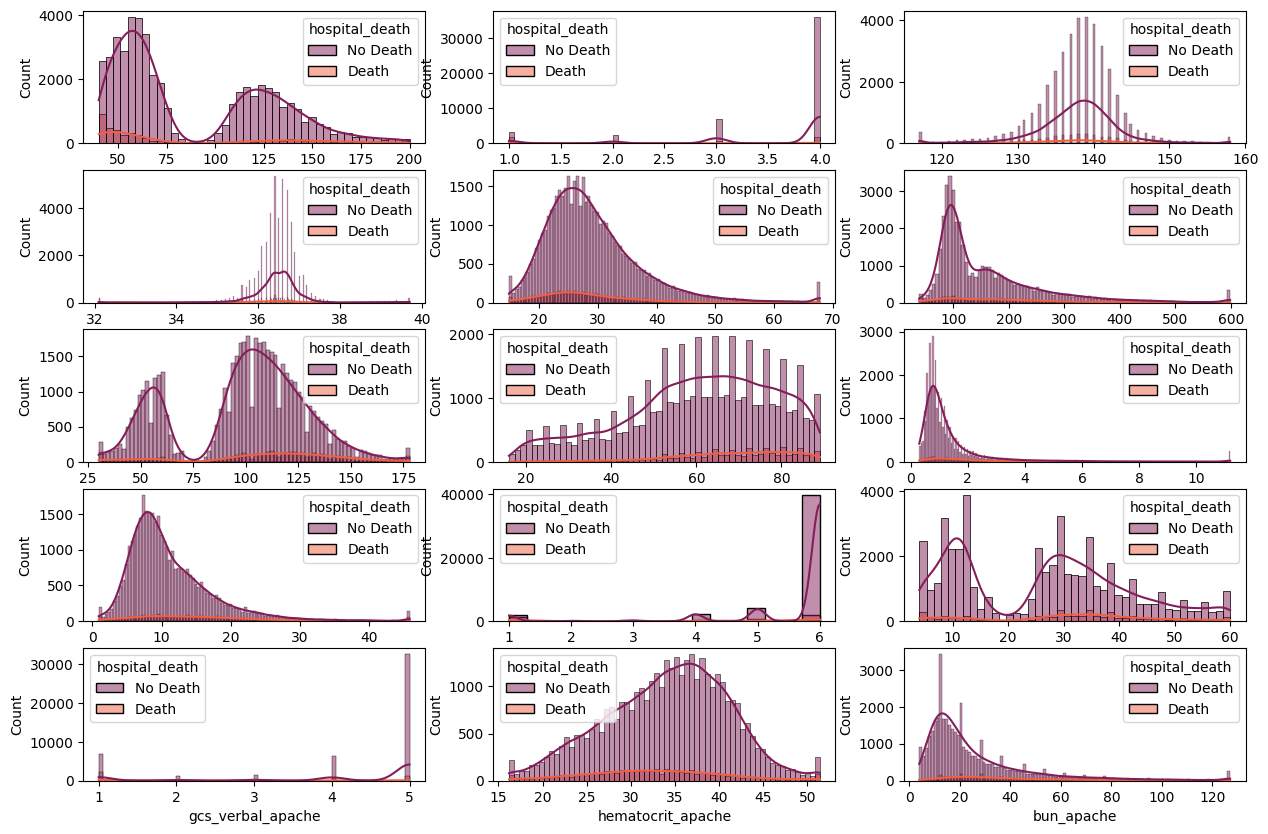

In [40]:
# checking the difference in distribution of numerical features in two classes

remaining_numerical_columns = list(set(numerical_columns) - set(high_missing))
len(remaining_numerical_columns) #15

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(15, 10))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(remaining_numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data_dscrpt, x=column, hue= target_column, kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

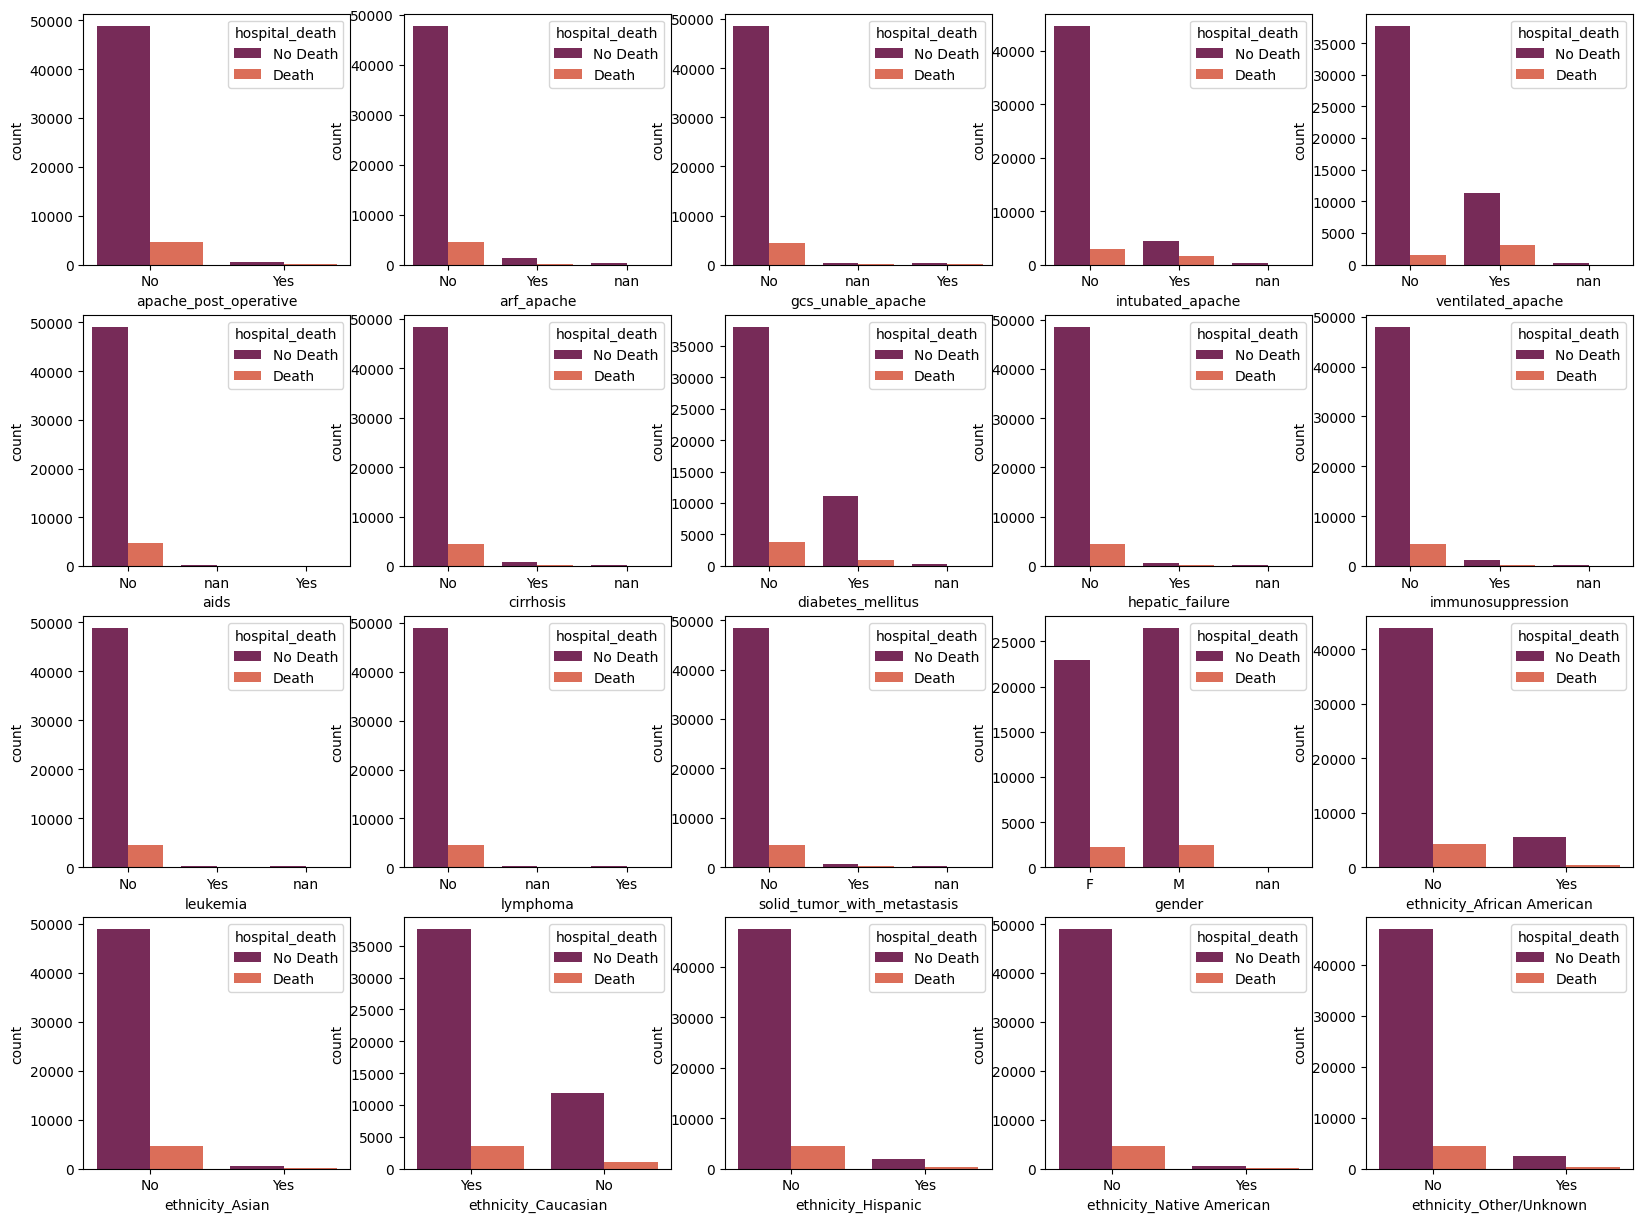

In [41]:
# checking the difference in distribution of categorical features in two classes
len(categorical_columns) # 20

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 15))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(categorical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 5
    y = i % 5

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.countplot(data_dscrpt, x=column, hue= target_column, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

Correlation with numerical variables

---



<Axes: >

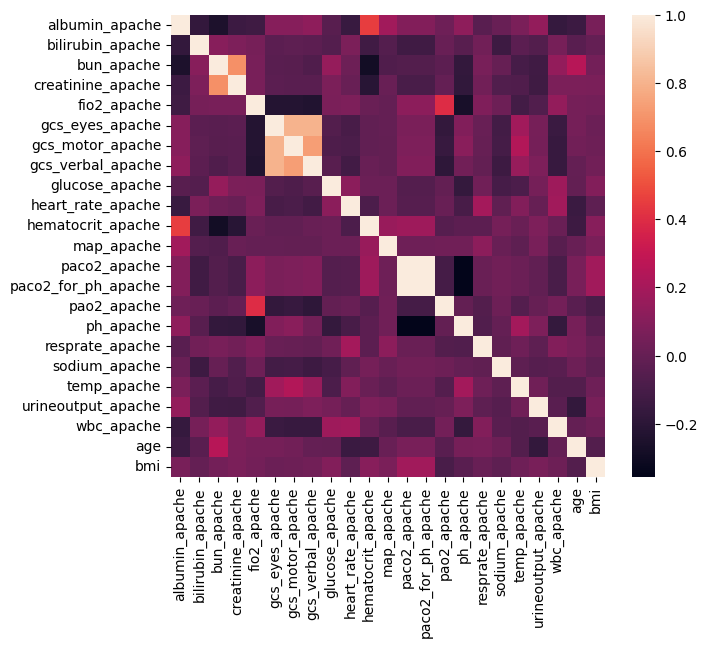

In [26]:
# correlation matrix
columns = numerical_columns + [target_column]

plt.figure(figsize=(7,6))
sns.heatmap(data[columns].corr())

In [42]:
# Drop Variables missing 50% or more
data = data.drop(columns=high_missing)

print(data.shape)
data

(54060, 36)


,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,hospital_death,age,bmi,gender,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
2,No,No,NaN,NaN,3.0,6.0,No,5.0,NaN,102.0,NaN,No,68.0,37.0,NaN,36.7,No,NaN,No Death,25.0,31.950000,F,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
4,No,No,NaN,NaN,NaN,NaN,nan,NaN,NaN,60.0,NaN,No,103.0,16.0,NaN,36.7,No,NaN,No Death,19.0,NaN,M,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
5,No,No,13.0,0.71,4.0,6.0,No,5.0,156.0,113.0,44.2,No,130.0,35.0,137.0,36.6,No,10.90,No Death,67.0,27.560000,M,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No
6,No,No,18.0,0.78,4.0,6.0,No,5.0,197.0,133.0,33.5,Yes,138.0,53.0,135.0,35.0,Yes,5.90,No Death,59.0,57.450000,F,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No
7,No,No,48.0,2.05,4.0,6.0,No,5.0,164.0,120.0,22.6,No,60.0,28.0,140.0,36.6,Yes,12.80,No Death,70.0,NaN,M,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91705,No,No,15.0,0.80,4.0,6.0,No,5.0,240.0,88.0,NaN,No,54.0,13.0,134.0,36.4,No,NaN,No Death,67.0,28.876843,M,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No
91706,No,No,15.0,0.70,4.0,6.0,No,5.0,91.0,55.0,41.0,No,62.0,12.0,139.0,36.6,No,7.14,No Death,54.0,19.770448,M,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
91707,No,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,No Death,NaN,33.933518,F,nan,nan,nan,nan,nan,nan,nan,nan,No,No,Yes,No,No,No
91710,No,No,33.0,2.30,3.0,6.0,No,4.0,538.0,158.0,36.0,No,57.0,4.0,135.0,35.8,No,17.55,No Death,48.0,27.236914,M,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No


In [45]:
# Export dataset to shared drive
data.to_csv('data_clean.csv')
!cp data_clean.csv "/content/drive/MyDrive/Machine Learning /Datathon #4"